# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nadvoitsy
Processing Record 2 of Set 1 | yazman
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | salinas
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | padang
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | pimenta bueno
Processing Record 13 of Set 1 | paamiut
Processing Record 14 of Set 1 | penzance
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | fort nelson
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | cozumel
City not found. Skipping...
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | hit

Processing Record 37 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | asau
City not found. Skipping...
Processing Record 45 of Set 4 | wattegama
Processing Record 46 of Set 4 | savannah bight
Processing Record 47 of Set 4 | inongo
Processing Record 48 of Set 4 | rehau
Processing Record 49 of Set 4 | launceston
Processing Record 0 of Set 5 | helong
Processing Record 1 of Set 5 | san-pedro
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | karakendzha
City not found. Skipping...
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | buriti bravo
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | orapa
Processing Record 8 of Set 5 | yanan

Processing Record 25 of Set 8 | saint-augustin
Processing Record 26 of Set 8 | salalah
Processing Record 27 of Set 8 | noumea
Processing Record 28 of Set 8 | wufeng
Processing Record 29 of Set 8 | abu samrah
Processing Record 30 of Set 8 | kapurthala
Processing Record 31 of Set 8 | korla
City not found. Skipping...
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | erenhot
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | hailey
Processing Record 37 of Set 8 | tashla
Processing Record 38 of Set 8 | klyuchi
Processing Record 39 of Set 8 | formosa do rio preto
Processing Record 40 of Set 8 | zonguldak
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | kisanga
Processing Record 43 of Set 8 | marathokambos
City not found. Skipping...
Processing Record 44 of Set 8 | dongsheng
Processing Record 45 of Set 8 | plettenberg bay
P

Processing Record 6 of Set 12 | tenenkou
Processing Record 7 of Set 12 | sept-iles
Processing Record 8 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 12 | bayir
Processing Record 10 of Set 12 | hvolsvollur
City not found. Skipping...
Processing Record 11 of Set 12 | santa isabel do rio negro
Processing Record 12 of Set 12 | macau
Processing Record 13 of Set 12 | les cayes
Processing Record 14 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 15 of Set 12 | mbandaka
Processing Record 16 of Set 12 | phibun mangsahan
Processing Record 17 of Set 12 | mayskiy
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | ibirataia
Processing Record 20 of Set 12 | borovoy
Processing Record 21 of Set 12 | shihezi
Processing Record 22 of Set 12 | beira
Processing Record 23 of Set 12 | opoczno
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | gamba
Processing Record 26 of Set 12 | mount gambier
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [10]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nadvoitsy,88,RU,1552955407,95,63.89,34.27,32.36,4.76
1,yazman,0,SY,1552955407,91,36.74,38.46,44.51,5.55
2,busselton,20,AU,1552955304,35,-33.64,115.35,81.00,8.68
3,mehamn,44,NO,1552955409,81,71.03,27.85,24.53,7.78
4,souillac,90,FR,1552955409,93,45.60,-0.60,46.99,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

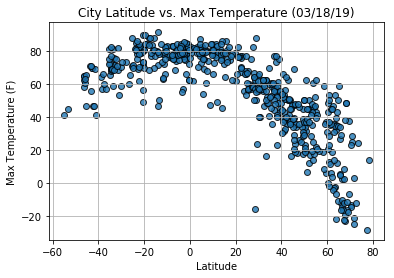

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

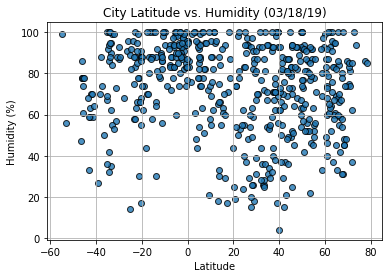

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

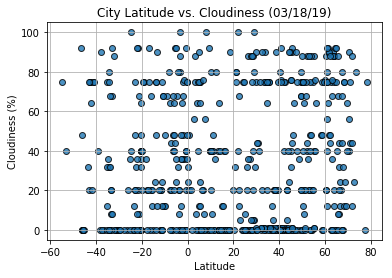

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

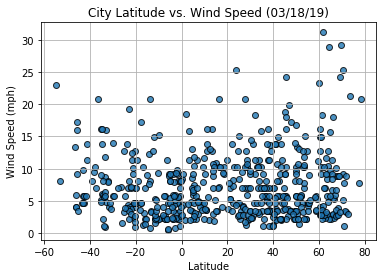

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [ ]:
#Observations from the Analysis
## Latitude -40 to 20 demonstrated the higher temperatures
## Humidity level for the latitude between -60 and -40 was on the lower side
## The Cloudliness is much less between -60 and -40
## The Cities between the latitude 60 and 80 showed highest peak in the wind speed